<a href="https://colab.research.google.com/github/alondraSanchezM/sequias-en-Mexico-y-agricultura/blob/main/Sequias_Equipo13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sequías en México: evolución a través de los años e implicaciones en la agricultura.** 




## Identificación del problema

Hoy en día, la sequía es uno de los desastres naturales que más daños está provocando entre la población mexicana, principalmente en la zona norte del país. La sequía es una anomalía climatológica, cuya característica principal es la disminución o ausencia de precipitaciones pluviales respecto al índice anual [[1]](http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0186-03482014000200008#notas). A pesar de que las causas de la sequía no se conocen con precisión, se admite que en general se debe a alteraciones de patrones de circulación atmosférica, que a su vez son ocasionadas por el aumento de las temperaturas de los suelos y mares, así como por factores sociales donde se destacan las malas políticas de administración y usos de reservas de agua [[2]](http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1870-39252005000300002).

México es un país susceptible a las sequías gracias a su ubicación geográfica, ya que cerca del 52% del territorio nacional está catalogado como árido o semiárido y aproximademente un cuarto del mismo siempre experimenta algún grado de sequía anualmente [[3]](https://www.redalyc.org/pdf/102/10203402.pdf). Asimismo gran parte de la población es vulnerable a los efectos que ésta provoca: cada año las sequías afectan la vida de decenas de millones en el país, teniendo un impacto devastador tanto en la seguridad alimentaria como en la producción de alimentos [[4]](https://centroclima.org/clima/agriculture-stress-index-system-asis/).

Por lo anterior, es de suma importancia el monitoreo y registro de las sequías. En México, el Servicio Meteorológico Nacional (SMN) es el encargado de detectar el estado actual y la evolución de este fenómeno. Su metodología se basa en la obtención e interpretación de índices tales como el Índice Estandarizado de Precipitación (SPI) que cuantifica las condiciones de déficit o exceso de precipitación, Índice Satelital de Salud de la Vegetación (VHI) que mide el grado de estrés de la vegetación por el % de área con media VHI menor a 35 y la Anomalía de la Temperatura Media [[5]](https://smn.conagua.gob.mx/es/climatologia/monitor-de-sequia/monitor-de-sequia-en-mexico). Los cuales permiten clasificar la intensidad de la sequía en 5 tipos:

* Anormalmente Seco (D0)
* Sequía Moderada (D1)
* Sequía Severa (D2)
* Sequía Extrema (D3)
* Sequía Excepcional (D4)

Durante la elección de este proyecto, reconocimos la urgencia de las actuales consecuencias de este fenómeno, lo que nos motivó a analizar los factores responsables del mismo para así encontrar su relación con el sector agrícola y estudiar su impacto. De la misma manera, para en un futuro poder predecir los actuales y próximos periodos de sequía.

### Referencias

[1] http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0186-03482014000200008#notas 

[2] http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1870-39252005000300002

[3] https://www.redalyc.org/pdf/102/10203402.pdf

[4] https://centroclima.org/clima/agriculture-stress-index-system-asis/

[5] https://smn.conagua.gob.mx/es/climatologia/monitor-de-sequia/monitor-de-sequia-en-mexico








## Planteamiento de preguntas









* ¿El área afectada por las sequías está incrementando a lo largo del tiempo? 
* ¿Qué estados han tenido el mayor porcentaje de área afectada por las sequías? 
* ¿Cómo ha evolucionado el promedio mensual de precipitaciones a lo largo de los diferentes estados de nuestro país? 
* ¿Cuáles son los estados con un mayor índice de estrés agrícola en los últimos años? 
* ¿La temperatura está aumentando en el país? 


## Colección de datos

Los datos obtenidos para la realización de este proyecto provienen de tres fuentes diferentes, a continuación se enumeran: 

* **North American Drought Monitor (NADM):** Es un esfuerzo cooperativo entre expertos en sequía en Canadá, Estados Unidos y México para monitorear la sequía en todo el continente de manera continua. Los datos recolectados corresponden al porcentaje de área en las categorías de monitores de sequía de América del Norte zona México. [Link a los datos](https://droughtmonitor.unl.edu/NADM/Statistics.aspx)

* **The Food and Agriculture Organization (FAO):** Es una agencia especializada de las Naciones Unidas que lidera los esfuerzos internacionales para vencer el hambre. Los datos recolectados corresponden al Índice de estrés agrícola (ASI) en México. [Link a los datos](http://www.fao.org/giews/earthobservation/country/index.jsp?code=MEX)

* **Datos abiertos de México:** Es una inciativa de parte del gobierno Méxicano para que cualquiera, en cualquier lugar y momento, pueda usar, reusar y distribuir libremente los datos proporcionados. 
  * Datos del comportamiento de la temperatura promedio a nivel mensual estatal y nacional desde 1985 a la fecha medida a través de estaciones convencionales y automáticas por CONAGUA. [Link a los datos](https://datos.gob.mx/busca/dataset/temperatura-promedio-excel)
  * Datos del comportamiento de la lluvia promedio mensual a nivel estatal y nacional desde 1985 a la fecha medida a través de estaciones convencionales y automáticas por CONAGUA. [Link a los datos](https://datos.gob.mx/busca/dataset/precipitacion)


## Extracción de datos

#### Importación de librerías

Las librerías que se utilizarán durante todo el proceso se enumeran y se importan a continuación: 

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

#### Datos de sequías


Tras analizar la página web, se observó que **no** era posible **descargar** el archivo con los datos ya que se trataba de una tabla interactiva que varía según los parámetros solicitados. Por lo tanto, debemos de extraerlos mediante **una** petición GET directa al sitio indicándole las siguientes cosas:
- URL: https://droughtmonitor.unl.edu/NADM/Statistics.aspx Es la página en donde esta la tabla con los datos.
- Parámetros:

  *   `'area'`: Es el código perteneciente a cada estado. En nuestro caso, los códigos de los estados iban desde `"MX01"` hasta `"MX32"`.
  *   `'type'`: Determina si la información esta dada por país (`"country"`) o por estado (`"state"`). En nuestro caso, se utilizó el parámetro `'type':'"state"'`.
  *   `'statstype'`: El sitio ofrece diferentes estadísticas acerca de las sequías, pero la que nosotros nos es útil para nuestro analísis es la número (`"2"`), que hace referencia al porcentaje de área afectada por cada tipo de sequía.

- Headers:
  - `Content-Type: 'application/json; charset=utf-8'`. Debido a que la información deseada se encontraba en formato JSON, y sin este header se obtenía el html completo de la página.



In [97]:
#Diccionario Código:Estado
codigos = {
  "MX01": "Aguascalientes",
  "MX02": "Baja California",
  "MX03": "Baja California Sur",
  "MX04": "Campeche",
  "MX05": "Chiapas",
  "MX06": "Chihuahua",    
  "MX07": "Coahuila",  
  "MX08": "Colima",
  "MX09": "Ciudad De Mexico",    
  "MX10": "Durango",
  "MX11": "Guanajuato",   
  "MX12": "Guerrero",
  "MX13": "Hidalgo",
  "MX14": "Jalisco",
  "MX15": "Estado De Mexico", 
  "MX16": "Michoacan",  
  "MX17": "Morelos",
  "MX18": "Nayarit",
  "MX19": "Nuevo Leon",   
  "MX20": "Oaxaca",
  "MX21": "Puebla",
  "MX22": "Queretaro",   
  "MX23": "Quintana Roo",
  "MX24": "San Luis Potosi", 
  "MX25": "Sinaloa",
  "MX26": "Sonora",
  "MX27": "Tabasco",
  "MX28": "Tamaulipas",
  "MX29": "Tlaxcala",
  "MX30": "Veracruz",
  "MX31": "Yucatan",
  "MX32": "Zacatecas"
}

URL = "https://droughtmonitor.unl.edu/NADM/Statistics.aspx/ReturnTabularNadm"

params = {
  "type": "'state'",
  "area": "",
  "statstype": "'2'"
}

headers = {
  "Content-Type": "application/json; charset=utf-8"
}

df_sequias_raw = pd.DataFrame()

#Ciclo for para petición
for codigo, estado in codigos.items():
  params["area"] = "'" + codigo + "'"
  response = requests.get(
      URL,
      headers=headers,
      params=params
  )
  df = pd.DataFrame(response.json()["d"])
  #Para crear una columna que contenga el nombre de cada estado
  df["Entidad"] = estado
  df_sequias_raw = pd.concat([df_sequias_raw,df], axis=0)
  
df_sequias_raw

,__type,ReleaseID,Date,FileDate,D0,D1,D2,D3,D4,None,Entidad
0,DroughtMonitorSite.code.NadmData,225,2021-07-31,20210731,0.00,0.00,0.00,0.0,0.0,100.00,Aguascalientes
1,DroughtMonitorSite.code.NadmData,224,2021-06-30,20210630,37.64,3.54,0.00,0.0,0.0,58.82,Aguascalientes
2,DroughtMonitorSite.code.NadmData,223,2021-05-31,20210531,0.00,73.87,26.13,0.0,0.0,0.00,Aguascalientes
3,DroughtMonitorSite.code.NadmData,222,2021-04-30,20210430,0.00,51.55,48.45,0.0,0.0,0.00,Aguascalientes
4,DroughtMonitorSite.code.NadmData,221,2021-03-31,20210331,0.00,75.85,24.15,0.0,0.0,0.00,Aguascalientes
...,...,...,...,...,...,...,...,...,...,...,...
220,DroughtMonitorSite.code.NadmData,5,2003-03-31,20030331,3.90,0.08,0.00,0.0,0.0,96.02,Zacatecas
221,DroughtMonitorSite.code.NadmData,4,2003-02-28,20030228,3.83,0.03,0.00,0.0,0.0,96.14,Zacatecas
222,DroughtMonitorSite.code.NadmData,3,2003-01-31,20030131,3.83,0.03,0.00,0.0,0.0,96.14,Zacatecas
223,DroughtMonitorSite.code.NadmData,2,2002-12-31,20021231,3.83,0.03,0.00,0.0,0.0,96.14,Zacatecas


Ya con la fase de extracción completada, podemos guardar nuestros datos en un archivo de tipo `csv`. Este archivo nos será de ayuda en caso de que quisiéramos regresar a la versión inicial de los datos. 

In [98]:
df_sequias_raw.to_csv("Sequias_Mexico_raw.csv")

#### Datos estrés agrícola


Pandas no puede leer `'csv'` desde string, `'pd.read_csv'` sólo funciona con archivos de tipo objeto. Por lo tanto, se debe crear un archivo utilizando  `'io.StringIO(response.content.decode('utf-8'))'`.


In [99]:
response = requests.get('http://www.fao.org/giews/earthobservation/asis/data/country/MEX/MAP_ASI/DATA/ASI_Dekad_Season1_data.csv')

file_object = io.StringIO(response.content.decode('utf-8'))
df_IEA_raw = pd.read_csv(file_object)
df_IEA_raw

,Indicator,Country,ADM1_CODE,Province,Land_Type,Date,Data,Year,Month,Dekad,Unit,Source
0,Agricultural Stress Index (ASI),Mexico,2028,Aguascalientes,Crop Area,1984-01-01,0.000,1984,1,1,% of area with Mean VHI below 35,FAO-ASIS
1,Agricultural Stress Index (ASI),Mexico,2028,Aguascalientes,Crop Area,1984-01-11,0.000,1984,1,2,% of area with Mean VHI below 35,FAO-ASIS
2,Agricultural Stress Index (ASI),Mexico,2028,Aguascalientes,Crop Area,1984-01-21,0.000,1984,1,3,% of area with Mean VHI below 35,FAO-ASIS
3,Agricultural Stress Index (ASI),Mexico,2028,Aguascalientes,Crop Area,1984-02-01,0.000,1984,2,1,% of area with Mean VHI below 35,FAO-ASIS
4,Agricultural Stress Index (ASI),Mexico,2028,Aguascalientes,Crop Area,1984-02-11,0.000,1984,2,2,% of area with Mean VHI below 35,FAO-ASIS
...,...,...,...,...,...,...,...,...,...,...,...,...
41106,Agricultural Stress Index (ASI),Mexico,2055,Tamaulipas,Crop Area,2021-08-01,0.789,2021,8,1,% of area with Mean VHI below 35,FAO-ASIS
41107,Agricultural Stress Index (ASI),Mexico,2056,Tlaxcala,Crop Area,2021-08-01,0.163,2021,8,1,% of area with Mean VHI below 35,FAO-ASIS
41108,Agricultural Stress Index (ASI),Mexico,2057,Veracruz,Crop Area,2021-08-01,0.906,2021,8,1,% of area with Mean VHI below 35,FAO-ASIS
41109,Agricultural Stress Index (ASI),Mexico,2058,Yucatan,Crop Area,2021-08-01,0.693,2021,8,1,% of area with Mean VHI below 35,FAO-ASIS


De la misma manera que con los datos de sequia, almacenamos este dataset puro.

In [100]:
df_IEA_raw.to_csv("IEA_Mexico_raw.csv")

#### Datos de temperatura media mensual

El link de descarga proporciona un zip con un archivo para cada año de 1985 a 2021. Se obtendrán los datos directamente del enlace utilizando las librerías:  
*   `urllib`: para abrir el enlace.
*   `io`: para manipular el objeto sin tener que descargarlo a nuestro drive.
*   `zipfile`: para descomprimirlo. 

In [101]:
# Asignamos el enlace
resp_temp = urlopen('http://datos.conagua.gob.mx/DatosAbiertos/Temperatura_Promedio_Excel.zip')
# Descomprimimos el enlace
zipfile_temp = ZipFile(BytesIO(resp_temp.read()))
# Obtenemos la lista de archivos contenidos en el zip 
lista_archivos_temp = zipfile_temp.namelist()
# Los archivos están contenidos dentro de otra carpeta en el zip, por ello se elimina el nombre de la carpeta
lista_archivos_temp.pop(0)

'Temperatura_Promedio_Excel/'

Ahora podemos iterar sobre la lista de archivos y crear un dataframe conjunto. Se agrega un identificador `Year` para poder distinguir entre los datos. 

In [102]:
# Iniciamos el DataFrame
df_temperatura_media = pd.DataFrame()
# Iteramos sobre la lista de archivos para crear un DataFrame conjunto
for archivo in lista_archivos_temp:
    df = pd.read_excel(zipfile_temp.open(archivo),skiprows=1)
    #  Añadimos el año de los datos
    df["Year"] = lista_archivos_temp.index(archivo)+1985
    df_temperatura_media = df_temperatura_media.append(df)
df_temperatura_media

,ENTIDAD,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Year
0,AGUASCALIENTES,11.967094,14.325850,17.051892,17.757925,21.183229,19.555818,18.122211,18.662660,18.876058,17.812996,14.964776,13.291935,16.964370,1985
1,BAJA CALIFORNIA,11.052290,12.020371,13.327013,17.784793,19.014780,22.829886,26.029444,25.755290,21.776102,19.454984,14.226904,12.896353,18.014017,1985
2,BAJA CALIFORNIA SUR,15.702536,16.341758,18.869057,20.618486,22.771742,25.078030,27.942791,28.599667,27.457056,24.077373,20.218419,17.895560,22.131040,1985
3,CAMPECHE,22.932142,24.354781,26.765947,27.195333,28.384986,28.042711,27.602259,27.689912,27.225265,26.546207,25.555455,24.349107,26.387009,1985
4,COAHUILA,8.438872,12.069164,18.016687,19.857930,23.492708,24.373270,24.376498,24.823414,23.656209,20.346794,18.211811,13.224615,19.240664,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,TLAXCALA,12.600000,13.000000,16.200000,16.800000,16.900000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
29,VERACRUZ,19.000000,19.900000,22.500000,24.900000,25.800000,25.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
30,YUCATÁN,23.300000,24.700000,26.600000,29.100000,29.500000,28.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
31,ZACATECAS,13.000000,15.500000,18.200000,19.900000,21.600000,21.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [103]:
#Guardamos los datos en un csv
df_temperatura_media.to_csv("Temperatura_Media_Mexico_raw.csv")

#### Datos de precipitación

El link de descarga proporciona un zip con un archivo para cada año de 1985 a 2021; por ende repetiremos el mismo procedimiento utilizado para extracción de datos de temperaturas. 

In [104]:
# Asignamos el enlace
resp_preci = urlopen('http://201.116.60.46/DatosAbiertos/Precipitacion.zip')
# Descomprimimos el enlace
zipfile_preci = ZipFile(BytesIO(resp_preci.read()))
# Obtenemos la lista de archivos contenidos en el zip 
lista_archivos_preci = zipfile_preci.namelist()
# Los archivos están contenidos dentro de otra carpeta en el zip, por ello se elimina el nombre de la carpeta
lista_archivos_preci.pop(0)
# Hay un archivo repetido para el 2020 que está incompleto, se tiene que eliminar
lista_archivos_preci.pop(35)

# Iniciamos el DataFrame
df_precipitacion= pd.DataFrame()
# Iteramos sobre la lista de archivos para crear un DataFrame conjunto
for archivo in lista_archivos_preci:
    df = pd.read_excel(zipfile_preci.open(archivo),skiprows=1)
    #  Añadimos el año de los datos
    df["Year"] = lista_archivos_preci.index(archivo)+1985
    df_precipitacion = df_precipitacion.append(df)

In [105]:
#Guardamos los datos en un csv
df_precipitacion.to_csv("Precipitacion_Media_Mexico_raw.csv")

## Análisis exploratorio de los datos

#### Exploración a dataframe de sequías

Para hacer una exploración rápida de nuestros datos utilizaremos el método `info()` y las funciones `head()` y `tail()`

In [106]:
df_sequias_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 0 to 224
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   __type     7200 non-null   object 
 1   ReleaseID  7200 non-null   int64  
 2   Date       7200 non-null   object 
 3   FileDate   7200 non-null   object 
 4   D0         7200 non-null   float64
 5   D1         7200 non-null   float64
 6   D2         7200 non-null   float64
 7   D3         7200 non-null   float64
 8   D4         7200 non-null   float64
 9   None       7200 non-null   float64
 10  Entidad    7200 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 675.0+ KB


In [107]:
df_sequias_raw.head()

,__type,ReleaseID,Date,FileDate,D0,D1,D2,D3,D4,None,Entidad
0,DroughtMonitorSite.code.NadmData,225,2021-07-31,20210731,0.00,0.00,0.00,0.0,0.0,100.00,Aguascalientes
1,DroughtMonitorSite.code.NadmData,224,2021-06-30,20210630,37.64,3.54,0.00,0.0,0.0,58.82,Aguascalientes
2,DroughtMonitorSite.code.NadmData,223,2021-05-31,20210531,0.00,73.87,26.13,0.0,0.0,0.00,Aguascalientes
3,DroughtMonitorSite.code.NadmData,222,2021-04-30,20210430,0.00,51.55,48.45,0.0,0.0,0.00,Aguascalientes
4,DroughtMonitorSite.code.NadmData,221,2021-03-31,20210331,0.00,75.85,24.15,0.0,0.0,0.00,Aguascalientes


In [108]:
df_sequias_raw.tail()

,__type,ReleaseID,Date,FileDate,D0,D1,D2,D3,D4,None,Entidad
220,DroughtMonitorSite.code.NadmData,5,2003-03-31,20030331,3.90,0.08,0.0,0.0,0.0,96.02,Zacatecas
221,DroughtMonitorSite.code.NadmData,4,2003-02-28,20030228,3.83,0.03,0.0,0.0,0.0,96.14,Zacatecas
222,DroughtMonitorSite.code.NadmData,3,2003-01-31,20030131,3.83,0.03,0.0,0.0,0.0,96.14,Zacatecas
223,DroughtMonitorSite.code.NadmData,2,2002-12-31,20021231,3.83,0.03,0.0,0.0,0.0,96.14,Zacatecas
224,DroughtMonitorSite.code.NadmData,1,2002-11-30,20021130,3.83,0.03,0.0,0.0,0.0,96.14,Zacatecas


In [109]:
df_sequias_raw.describe()

,ReleaseID,D0,D1,D2,D3,D4,None
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,113.000000,21.152092,11.436035,5.424350,1.981671,0.311225,58.463218
std,64.955775,24.238689,19.857668,14.814493,9.182008,3.367680,38.361178
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.967500
50%,113.000000,13.285000,0.030000,0.000000,0.000000,0.000000,68.285000
75%,169.000000,33.755000,15.830000,0.400000,0.000000,0.000000,97.722500
max,225.000000,100.000000,100.000000,100.000000,100.000000,91.990000,100.000000


Podemos observar que el DataFrame que obtuvimos tiene 11 columnas y un total de 7200 entradas. Las columnas del DataFrame son las siguientes:
- `__type`: Esta columna tiene el mismo valor para todas las entradas (`DroughtMonitorSite.code.NadmData`), pensamos que podría indicar el origen de los datos, es decir, en donde el archivo original con los datos está localizado. Es de tipo `object` y mediante la exploración rápida podemos indicar que solo contiene strings.
- `ReleaseID`: Es una secuencia que empieza en el número 1 y termina en el 224, en donde el 1 está asignado al registro con la fecha más antigua y va incrementando en uno hasta llegar a la fecha más reciente. Es de `int64`.
- `Date`: Como su nombre lo indica, la columna almacena la fecha en formato `"%y-%m-%d"`. Aunque representa la fecha en un formato válido, el tipo de dato de la columna es  `object` y siempre contiene la fecha en el formato anteriormente mencionado.
- `FileDate`: Esta columna representa la fecha como un string y sin ningún tipo de separadores. El tipo de dato es `object` y siempre mantiene el mismo formato.
- `None`: Indica el porcentaje del área que **no** está siendo afectada por sequía del estado. Su rango de valores es de 0 a 100. Es de tipo `float64`.
- `D0`, `D1`, `D2`, `D3`, `D4`: Estas columnas contienen el porcentaje de área de cada estado que ha sufrido de cada tipo de sequía en la fecha indicada. Estas cinco columnas son del tipo `float64`. El rango de valores que estas columnas pueden tener es entre 0 y 100, ya que indican porcentajes.
- `Entidad`: Esta columna es la que agregamos en el paso de extracción para poder identificar a qué estado correspondían los datos, ya con la exploración que acabamos de realizar nos dimos cuenta que de no haber agregado esta columna, los datos serían imposibles de distinguirse entre sí.

Parece que todo está correcto con nuestros datos y que no hay ningún `Nan` en nuestro DataFrame, pero para estar seguros, ejecutaremos la siguiente celda:

In [110]:
df_sequias_raw.isnull().values.any()

False

#### Exploración a dataframe de estrés agrícola

Realizamos una exploración inicial para concocer los datos que se van a manejar, el tipo de dato, si existen valores `Nan`, etc. 

In [111]:
df_IEA_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41111 entries, 0 to 41110
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  41111 non-null  object 
 1   Country    41111 non-null  object 
 2   ADM1_CODE  41111 non-null  int64  
 3   Province   41111 non-null  object 
 4   Land_Type  41111 non-null  object 
 5   Date       41111 non-null  object 
 6   Data       41111 non-null  float64
 7   Year       41111 non-null  int64  
 8   Month      41111 non-null  int64  
 9   Dekad      41111 non-null  int64  
 10  Unit       41111 non-null  object 
 11  Source     41111 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 3.8+ MB


In [112]:
df_IEA_raw.head()

,Indicator,Country,ADM1_CODE,Province,Land_Type,Date,Data,Year,Month,Dekad,Unit,Source
0,Agricultural Stress Index (ASI),Mexico,2028,Aguascalientes,Crop Area,1984-01-01,0.0,1984,1,1,% of area with Mean VHI below 35,FAO-ASIS
1,Agricultural Stress Index (ASI),Mexico,2028,Aguascalientes,Crop Area,1984-01-11,0.0,1984,1,2,% of area with Mean VHI below 35,FAO-ASIS
2,Agricultural Stress Index (ASI),Mexico,2028,Aguascalientes,Crop Area,1984-01-21,0.0,1984,1,3,% of area with Mean VHI below 35,FAO-ASIS
3,Agricultural Stress Index (ASI),Mexico,2028,Aguascalientes,Crop Area,1984-02-01,0.0,1984,2,1,% of area with Mean VHI below 35,FAO-ASIS
4,Agricultural Stress Index (ASI),Mexico,2028,Aguascalientes,Crop Area,1984-02-11,0.0,1984,2,2,% of area with Mean VHI below 35,FAO-ASIS


In [113]:
df_IEA_raw.tail()

,Indicator,Country,ADM1_CODE,Province,Land_Type,Date,Data,Year,Month,Dekad,Unit,Source
41106,Agricultural Stress Index (ASI),Mexico,2055,Tamaulipas,Crop Area,2021-08-01,0.789,2021,8,1,% of area with Mean VHI below 35,FAO-ASIS
41107,Agricultural Stress Index (ASI),Mexico,2056,Tlaxcala,Crop Area,2021-08-01,0.163,2021,8,1,% of area with Mean VHI below 35,FAO-ASIS
41108,Agricultural Stress Index (ASI),Mexico,2057,Veracruz,Crop Area,2021-08-01,0.906,2021,8,1,% of area with Mean VHI below 35,FAO-ASIS
41109,Agricultural Stress Index (ASI),Mexico,2058,Yucatan,Crop Area,2021-08-01,0.693,2021,8,1,% of area with Mean VHI below 35,FAO-ASIS
41110,Agricultural Stress Index (ASI),Mexico,2059,Zacatecas,Crop Area,2021-08-01,0.539,2021,8,1,% of area with Mean VHI below 35,FAO-ASIS


In [114]:
df_IEA_raw.describe()

,ADM1_CODE,Data,Year,Month,Dekad
count,41111.000000,41111.000000,41111.00000,41111.000000,41111.000000
mean,2043.565688,12.856698,2002.30296,6.555350,1.995743
std,9.086080,21.697550,10.85091,3.433717,0.815894
min,2028.000000,0.000000,1984.00000,1.000000,1.000000
25%,2036.000000,0.063000,1993.00000,4.000000,1.000000
50%,2044.000000,2.405000,2002.00000,7.000000,2.000000
75%,2051.000000,14.991500,2012.00000,10.000000,3.000000
max,2059.000000,100.000000,2021.00000,12.000000,3.000000


In [115]:
df_IEA_raw.isnull().values.any()

False

Se puede observar lo siguiente:
* El DataFrame contine 41079 entradas y 12 columnas. 
* Existen 5 columnas tipo object. 
* La fecha no sólo está en una columna; si no que además se repite el año y mes en otras dos columnas. 
* La variable Dekad divide la información del mes en tres periodos. 
* El valor del promedio de la columnaData es 12.86.
* No existen datos faltantes.

#### Exploración a dataframe de temperatura media mensual

Realizamos una exploración inicial para concocer los datos que se van a manejar, el tipo de dato, si exiten valores `Nan`, etc. 

In [116]:
df_temperatura_media.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 32
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ENTIDAD  1221 non-null   object 
 1   ENE      1221 non-null   float64
 2   FEB      1221 non-null   float64
 3   MAR      1221 non-null   float64
 4   ABR      1221 non-null   float64
 5   MAY      1221 non-null   float64
 6   JUN      1221 non-null   float64
 7   JUL      1188 non-null   float64
 8   AGO      1188 non-null   float64
 9   SEP      1188 non-null   float64
 10  OCT      1188 non-null   float64
 11  NOV      1188 non-null   float64
 12  DIC      1188 non-null   float64
 13  ANUAL    1188 non-null   float64
 14  Year     1221 non-null   int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 152.6+ KB


In [117]:
df_temperatura_media.head()

,ENTIDAD,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Year
0,AGUASCALIENTES,11.967094,14.325850,17.051892,17.757925,21.183229,19.555818,18.122211,18.662660,18.876058,17.812996,14.964776,13.291935,16.964370,1985
1,BAJA CALIFORNIA,11.052290,12.020371,13.327013,17.784793,19.014780,22.829886,26.029444,25.755290,21.776102,19.454984,14.226904,12.896353,18.014017,1985
2,BAJA CALIFORNIA SUR,15.702536,16.341758,18.869057,20.618486,22.771742,25.078030,27.942791,28.599667,27.457056,24.077373,20.218419,17.895560,22.131040,1985
3,CAMPECHE,22.932142,24.354781,26.765947,27.195333,28.384986,28.042711,27.602259,27.689912,27.225265,26.546207,25.555455,24.349107,26.387009,1985
4,COAHUILA,8.438872,12.069164,18.016687,19.857930,23.492708,24.373270,24.376498,24.823414,23.656209,20.346794,18.211811,13.224615,19.240664,1985


In [118]:
df_temperatura_media.tail()

,ENTIDAD,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Year
28,TLAXCALA,12.6,13.0,16.2,16.8,16.9,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
29,VERACRUZ,19.0,19.9,22.5,24.9,25.8,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
30,YUCATÁN,23.3,24.7,26.6,29.1,29.5,28.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
31,ZACATECAS,13.0,15.5,18.2,19.9,21.6,21.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
32,NACIONAL,16.4,18.0,20.3,23.0,24.8,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [119]:
df_temperatura_media.describe()

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Year
count,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1221.000000
mean,16.871352,18.301274,20.140313,22.288041,23.891609,24.395373,23.905459,23.925035,23.202057,21.644840,19.319347,17.319272,21.257711,2003.000000
std,4.356450,4.102967,3.811737,3.632412,3.516766,3.806361,4.160679,4.174072,4.041078,4.006098,4.132910,4.383636,3.655193,10.681453
min,6.419064,8.603275,10.925501,13.811973,14.726868,14.906667,13.980651,14.396887,13.933203,12.652495,10.773559,7.008619,13.300635,1985.000000
25%,13.221114,14.874926,17.071843,19.468571,21.474979,21.772048,20.536859,20.500452,19.862789,18.236420,15.821406,13.664925,18.100000,1994.000000
50%,16.146529,17.869867,19.750687,22.200000,24.000152,24.896061,24.501683,24.499667,23.494198,21.600000,18.922142,16.685390,21.388295,2003.000000
75%,20.800000,21.900000,23.400000,25.100000,26.700000,27.694455,27.506783,27.595637,26.868140,25.289810,23.221496,21.200000,24.618137,2012.000000
max,25.900000,26.700000,28.400000,31.100000,31.500000,31.500000,31.900000,32.500000,30.549925,29.700000,28.000000,26.900000,28.100000,2021.000000


In [120]:
df_temperatura_media.isnull().values.any()

True

Se puede observar lo siguiente:
* El DataFrame contine 1221 entradas y 15 columnas. 
* La mayoría de las columnas son tipo float. 
* El orden de las filas es por estados y por años, es decir; un año tiene 32 filas representando a cada estado. 
* La menor temperatura se ha presentado en Enero. 
* Existen datos NaN. 

#### Exploración a dataframe de precipitación

Realizamos una exploración inicial para concocer los datos que se van a manejar, el tipo de dato, si exiten valores `Nan`, etc. 

In [121]:
df_precipitacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 32
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ENTIDAD  1221 non-null   object 
 1   ENE      1221 non-null   float64
 2   FEB      1221 non-null   float64
 3   MAR      1221 non-null   float64
 4   ABR      1221 non-null   float64
 5   MAY      1221 non-null   float64
 6   JUN      1221 non-null   float64
 7   JUL      1188 non-null   float64
 8   AGO      1188 non-null   float64
 9   SEP      1188 non-null   float64
 10  OCT      1188 non-null   float64
 11  NOV      1188 non-null   float64
 12  DIC      1188 non-null   float64
 13  ANUAL    1188 non-null   float64
 14  Year     1221 non-null   int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 152.6+ KB


In [122]:
df_precipitacion.head()

,ENTIDAD,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Year
0,AGUASCALIENTES,4.914729,1.588740,1.947601,17.612315,21.458081,137.052753,85.398249,68.346737,47.644807,50.720046,4.287958,23.386522,464.358537,1985
1,BAJA CALIFORNIA,12.150562,23.625055,9.962204,3.723647,0.017576,0.343847,0.770047,0.000000,13.504450,17.268965,64.455974,28.568834,174.391162,1985
2,BAJA CALIFORNIA SUR,30.304723,0.058778,0.334605,0.259919,0.128790,0.331742,19.552045,22.872792,18.475133,15.577332,6.605846,1.133051,115.634756,1985
3,CAMPECHE,20.943153,26.685829,16.509803,4.248756,233.420941,124.723530,142.713987,194.129643,154.579157,32.833140,60.179980,4.037611,1015.005528,1985
4,COAHUILA,40.714546,6.152208,4.887759,43.611932,46.949689,46.314182,20.239590,29.999508,44.317659,41.583808,8.830908,6.715672,340.317462,1985


In [123]:
df_precipitacion.tail()

,ENTIDAD,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Year
28,TLAXCALA,11.9,0.6,2.0,18.8,77.4,130.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
29,VERACRUZ,85.0,25.4,22.7,32.1,103.5,276.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
30,YUCATÁN,45.9,55.1,23.0,47.6,118.8,230.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
31,ZACATECAS,1.5,0.0,0.0,2.0,17.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
32,NACIONAL,23.7,7.9,8.4,11.0,51.3,137.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [124]:
df_precipitacion.describe()

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Year
count,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1221.000000
mean,25.181030,19.159112,16.909325,21.013297,48.512556,129.675665,149.576171,160.540304,167.400812,91.386272,38.894987,24.493705,891.504156,2003.000000
std,39.853232,28.770772,23.597631,26.503308,52.296224,96.014071,89.757496,102.032835,109.108209,93.413841,54.352255,36.785626,505.327421,10.681453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.775653,1985.000000
25%,2.500000,1.485378,1.600000,2.200000,8.090848,59.400000,90.618401,90.771531,87.767943,29.700000,6.176443,2.690000,544.925000,1994.000000
50%,12.150562,9.140000,8.724494,12.155076,35.000000,113.010000,136.900000,144.800000,146.082629,63.850000,19.515000,11.853484,766.859225,2003.000000
75%,29.630000,24.500000,22.200000,29.600000,70.800000,182.503579,195.296034,211.092053,220.875000,122.650000,47.550000,31.292159,1141.913786,2012.000000
max,363.900000,308.700000,306.110000,221.900000,370.982274,691.700000,563.600000,756.700000,851.000000,802.500000,501.300000,460.500000,3366.900000,2021.000000


In [125]:
df_precipitacion.isnull().values.any()

True

Se puede observar lo siguiente:
* El DataFrame contine 1221 entradas y 15 columnas. 
* La mayoría de las columnas son tipo float. 
* El orden de las filas es por estados y por años, es decir; un año tiene 32 filas representando a cada estado. 
* Existen datos NaN, a primera vista parecen ser solamente del año 2021. 

## Limpieza de datos

#### Limpieza de dataframe de sequías

Afortunadamente la fuente de nuestros datos fue muy buena y no regresó ningún `Nan`, lo que si nos dió fueron algunas columnas que no nos son de utilidad para las preguntas que planteamos, por eso, vamos a proceder a eliminar estas columnas:
- `__type`
- `ReleaseID`
- `FileDate`


In [126]:
df_sequias_raw = df_sequias_raw.drop(["__type","ReleaseID","FileDate"], axis=1)
df_sequias_raw

,Date,D0,D1,D2,D3,D4,None,Entidad
0,2021-07-31,0.00,0.00,0.00,0.0,0.0,100.00,Aguascalientes
1,2021-06-30,37.64,3.54,0.00,0.0,0.0,58.82,Aguascalientes
2,2021-05-31,0.00,73.87,26.13,0.0,0.0,0.00,Aguascalientes
3,2021-04-30,0.00,51.55,48.45,0.0,0.0,0.00,Aguascalientes
4,2021-03-31,0.00,75.85,24.15,0.0,0.0,0.00,Aguascalientes
...,...,...,...,...,...,...,...,...
220,2003-03-31,3.90,0.08,0.00,0.0,0.0,96.02,Zacatecas
221,2003-02-28,3.83,0.03,0.00,0.0,0.0,96.14,Zacatecas
222,2003-01-31,3.83,0.03,0.00,0.0,0.0,96.14,Zacatecas
223,2002-12-31,3.83,0.03,0.00,0.0,0.0,96.14,Zacatecas


Por otra parte, se observó que el **índice** no era correcto, pues termina en el valor 224, aunque realmente el DataFrame tiene 7200 entradas. Por ello, se procedió a **reiniciarlo**.

In [127]:
df_sequias_raw.reset_index(drop=True, inplace=True)
df_sequias_raw

,Date,D0,D1,D2,D3,D4,None,Entidad
0,2021-07-31,0.00,0.00,0.00,0.0,0.0,100.00,Aguascalientes
1,2021-06-30,37.64,3.54,0.00,0.0,0.0,58.82,Aguascalientes
2,2021-05-31,0.00,73.87,26.13,0.0,0.0,0.00,Aguascalientes
3,2021-04-30,0.00,51.55,48.45,0.0,0.0,0.00,Aguascalientes
4,2021-03-31,0.00,75.85,24.15,0.0,0.0,0.00,Aguascalientes
...,...,...,...,...,...,...,...,...
7195,2003-03-31,3.90,0.08,0.00,0.0,0.0,96.02,Zacatecas
7196,2003-02-28,3.83,0.03,0.00,0.0,0.0,96.14,Zacatecas
7197,2003-01-31,3.83,0.03,0.00,0.0,0.0,96.14,Zacatecas
7198,2002-12-31,3.83,0.03,0.00,0.0,0.0,96.14,Zacatecas


Ya con nuestros datos limpios y solamente con las columnas que nos interesan, podemos pasar a la fase de procesamiento para ver si se necesita alguna transformación para nuestro DataFrame.

#### Limpieza de dataframe de estrés agrícola

En nuestro DataFrame tenemos columnas que no aportan nada a la hora de responder nuestras preguntas, por eso serán eliminadas:
- `Indicator`. El DataFrame solo contiene un tipo de dato relacionado al estrés agrícola, es por eso que esta columna se hace innecesaria.
- `Country`. Todos los datos son de México y además se tiene el campo de estado, lo cual es lo que nos interesa saber a la hora de responder nuestras preguntas.
- `AMD1_CODE`.
- `Land_type`. Al ser datos de estrés agrícola, el único tipo de área es de cultivo, por lo que es redundante tener esta columna.
- `Date`. Esta columna se hace irrelevante ya que tenemos `Year` y `Month` lo que nos es mejor para el propósito de este proyecto.
- `Unit`. Ya se ha especificado el valor y unidades del estrés agrícola en la investigación previa, por lo que no es necesario tener esta columna.
- `Source`. Todos los datos vienen de la misma fuente y además ya se ha citado en la investigación previa, por lo que se puede omitir esta columna. 

In [128]:
df_IEA_clean = df_IEA_raw.drop(["Indicator","Country","ADM1_CODE","Land_Type","Date","Unit","Source", "Dekad"], axis=1)

Por último paso corresponde reiniciar el índice:

In [129]:
df_IEA_clean.reset_index(drop=True, inplace=True)
df_IEA_clean

,Province,Data,Year,Month
0,Aguascalientes,0.000,1984,1
1,Aguascalientes,0.000,1984,1
2,Aguascalientes,0.000,1984,1
3,Aguascalientes,0.000,1984,2
4,Aguascalientes,0.000,1984,2
...,...,...,...,...
41106,Tamaulipas,0.789,2021,8
41107,Tlaxcala,0.163,2021,8
41108,Veracruz,0.906,2021,8
41109,Yucatan,0.693,2021,8


#### Limpieza de dataframe de temperatura media mensual

Primero reestructuramos el DataFrame utilizando la función `melt`. Convertimos las columnas correspondientes a cada mes y `ANUAL` en filas. Esto para poder eliminar con mayor facilidad los valores nulos. 

In [130]:
temperatura_media_mensual = df_temperatura_media.melt(id_vars=['ENTIDAD','Year'],var_name="Mes",value_name="Temperatura")

temperatura_media_mensual

,ENTIDAD,Year,Mes,Temperatura
0,AGUASCALIENTES,1985,ENE,11.967094
1,BAJA CALIFORNIA,1985,ENE,11.052290
2,BAJA CALIFORNIA SUR,1985,ENE,15.702536
3,CAMPECHE,1985,ENE,22.932142
4,COAHUILA,1985,ENE,8.438872
...,...,...,...,...
15868,TLAXCALA,2021,ANUAL,NaN
15869,VERACRUZ,2021,ANUAL,NaN
15870,YUCATÁN,2021,ANUAL,NaN
15871,ZACATECAS,2021,ANUAL,NaN


Comprobamos la cantidad de valores nulos: 

In [131]:
temperatura_media_mensual.isna().sum()

ENTIDAD          0
Year             0
Mes              0
Temperatura    231
dtype: int64

Eliminamos los valores nulos y comprobamos: 

In [132]:
temperatura_media_mensual = temperatura_media_mensual.dropna()

temperatura_media_mensual.isna().sum()


ENTIDAD        0
Year           0
Mes            0
Temperatura    0
dtype: int64

Finalmente, observamos que es necesario reiniciar el índice.  

In [133]:
temperatura_media_mensual.reset_index(inplace=True,drop=True)

temperatura_media_mensual

,ENTIDAD,Year,Mes,Temperatura
0,AGUASCALIENTES,1985,ENE,11.967094
1,BAJA CALIFORNIA,1985,ENE,11.052290
2,BAJA CALIFORNIA SUR,1985,ENE,15.702536
3,CAMPECHE,1985,ENE,22.932142
4,COAHUILA,1985,ENE,8.438872
...,...,...,...,...
15637,TLAXCALA,2020,ANUAL,15.300000
15638,VERACRUZ,2020,ANUAL,23.300000
15639,YUCATÁN,2020,ANUAL,27.300000
15640,ZACATECAS,2020,ANUAL,18.300000


#### Limpieza de dataframe de precipitación

Reestructuramos el DataFrame utilizando la función `melt` de la misma forma que el DataFrame de Temperatura. 

In [134]:
df_precipitacion = df_precipitacion.melt(id_vars=['ENTIDAD','Year'],var_name="Mes",value_name="Precipitacion")

df_precipitacion

,ENTIDAD,Year,Mes,Precipitacion
0,AGUASCALIENTES,1985,ENE,4.914729
1,BAJA CALIFORNIA,1985,ENE,12.150562
2,BAJA CALIFORNIA SUR,1985,ENE,30.304723
3,CAMPECHE,1985,ENE,20.943153
4,COAHUILA,1985,ENE,40.714546
...,...,...,...,...
15868,TLAXCALA,2021,ANUAL,NaN
15869,VERACRUZ,2021,ANUAL,NaN
15870,YUCATÁN,2021,ANUAL,NaN
15871,ZACATECAS,2021,ANUAL,NaN


Observamos en busca de las columnas con valores nulos: 

In [135]:
df_precipitacion.isna().sum()

ENTIDAD            0
Year               0
Mes                0
Precipitacion    231
dtype: int64

Y procedemos a eliminarlos y reiniciar el índice:

In [136]:
df_precipitacion = df_precipitacion.dropna()
df_precipitacion.reset_index(drop=True, inplace=True)
df_precipitacion

,ENTIDAD,Year,Mes,Precipitacion
0,AGUASCALIENTES,1985,ENE,4.914729
1,BAJA CALIFORNIA,1985,ENE,12.150562
2,BAJA CALIFORNIA SUR,1985,ENE,30.304723
3,CAMPECHE,1985,ENE,20.943153
4,COAHUILA,1985,ENE,40.714546
...,...,...,...,...
15637,TLAXCALA,2020,ANUAL,538.400000
15638,VERACRUZ,2020,ANUAL,1548.600000
15639,YUCATÁN,2020,ANUAL,1802.200000
15640,ZACATECAS,2020,ANUAL,406.300000


## Transformación, filtración y ordenamiento de datos

Hasta hora hemos trabajado con nuestras cuatro fuentes de información por separado, es momento de unirlas y tener un sólo dataframe el cual nos servirá para consultar y obtener hallazgos interesantes. 

Como primer paso comenzaremos realizando las preparaciones adecuadas a cada dataframe para poderlos unir correctamente. 

#### Tratamiento al dataframe de sequías

Reordenamos las columnas para una mayor facilidad de lectura. 

In [137]:
df_sequias = df_sequias_raw[["Date","Entidad","None","D0","D1","D2","D3","D4"]]

df_sequias

,Date,Entidad,None,D0,D1,D2,D3,D4
0,2021-07-31,Aguascalientes,100.00,0.00,0.00,0.00,0.0,0.0
1,2021-06-30,Aguascalientes,58.82,37.64,3.54,0.00,0.0,0.0
2,2021-05-31,Aguascalientes,0.00,0.00,73.87,26.13,0.0,0.0
3,2021-04-30,Aguascalientes,0.00,0.00,51.55,48.45,0.0,0.0
4,2021-03-31,Aguascalientes,0.00,0.00,75.85,24.15,0.0,0.0
...,...,...,...,...,...,...,...,...
7195,2003-03-31,Zacatecas,96.02,3.90,0.08,0.00,0.0,0.0
7196,2003-02-28,Zacatecas,96.14,3.83,0.03,0.00,0.0,0.0
7197,2003-01-31,Zacatecas,96.14,3.83,0.03,0.00,0.0,0.0
7198,2002-12-31,Zacatecas,96.14,3.83,0.03,0.00,0.0,0.0


En la limpieza anterior pudimos notar que la columna bajo el nombre de Date es de tipo object, es necesario corregir este problema mediante una transformación.

In [138]:
df_sequias["Date"] = pd.to_datetime(df_sequias["Date"])
df_sequias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     7200 non-null   datetime64[ns]
 1   Entidad  7200 non-null   object        
 2   None     7200 non-null   float64       
 3   D0       7200 non-null   float64       
 4   D1       7200 non-null   float64       
 5   D2       7200 non-null   float64       
 6   D3       7200 non-null   float64       
 7   D4       7200 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 450.1+ KB


Como nos centraremos en el área afectada, definimos una nueva columna llamada 'Area_total_afectada_sequias' utilizando None y, posteriormente, eliminamos None:

In [139]:
df_sequias['Area_total_afectada_sequias']=100-df_sequias['None']

In [140]:
df_sequias.drop('None',1,inplace=True)

In [141]:
df_sequias

,Date,Entidad,D0,D1,D2,D3,D4,Area_total_afectada_sequias
0,2021-07-31,Aguascalientes,0.00,0.00,0.00,0.0,0.0,0.00
1,2021-06-30,Aguascalientes,37.64,3.54,0.00,0.0,0.0,41.18
2,2021-05-31,Aguascalientes,0.00,73.87,26.13,0.0,0.0,100.00
3,2021-04-30,Aguascalientes,0.00,51.55,48.45,0.0,0.0,100.00
4,2021-03-31,Aguascalientes,0.00,75.85,24.15,0.0,0.0,100.00
...,...,...,...,...,...,...,...,...
7195,2003-03-31,Zacatecas,3.90,0.08,0.00,0.0,0.0,3.98
7196,2003-02-28,Zacatecas,3.83,0.03,0.00,0.0,0.0,3.86
7197,2003-01-31,Zacatecas,3.83,0.03,0.00,0.0,0.0,3.86
7198,2002-12-31,Zacatecas,3.83,0.03,0.00,0.0,0.0,3.86


#### Tratamiento al dataframe de estrés agrícola

Debido a que se tienen hasta 3 datos por mes se decidió hacer un promedio. Para esto se agrupan por Estado o Province, Año y Mes y se obtiene la media.

In [142]:
g = df_IEA_clean.groupby(["Province","Year","Month"])
IEA_promediado = g["Data"].mean()
IEA_promediado = IEA_promediado.reset_index()

Definimos un diccionario para transformar los meses numéricos a su nombre completo en inglés y lo aplicamos con map sobre la columna Month.

In [143]:
meses2 = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

IEA_promediado['Month'] = IEA_promediado['Month'].map(meses2)

Construimos la columna Fecha utilizando Year y Month:

In [144]:
IEA_promediado["Fecha"]=pd.to_datetime(IEA_promediado['Year'].astype(str) + IEA_promediado['Month'], format='%Y%B')

Eliminamos las columnas: Year y Month y ordenamos las sobrantes.

In [145]:
IEA_promediado = IEA_promediado.drop(["Year","Month"], axis=1)
IEA_promediado = IEA_promediado[["Province","Fecha","Data"]]
IEA_promediado

,Province,Fecha,Data
0,Aguascalientes,1984-01-01,0.000000
1,Aguascalientes,1984-02-01,0.000000
2,Aguascalientes,1984-03-01,0.000000
3,Aguascalientes,1984-05-01,0.000000
4,Aguascalientes,1984-06-01,4.766667
...,...,...,...
13962,Zacatecas,2021-04-01,30.952333
13963,Zacatecas,2021-05-01,34.826667
13964,Zacatecas,2021-06-01,25.269000
13965,Zacatecas,2021-07-01,1.150667


Cambiamos el nombre de algunas columnas y cambiamos el nombre de algunos estados para que coincida con los nombres en los otros DataFrames:

In [146]:
IEA_promediado.rename(columns={'Province':'Entidad','Data':'IEA'},inplace=True)
IEA_promediado.replace({'Distrito Federal':'Ciudad De Mexico','Mexico':'Estado De Mexico'},regex=True, inplace=True)
IEA_promediado['Entidad'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila', 'Colima',
       'Ciudad De Mexico', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
       'Jalisco', 'Estado De Mexico', 'Michoacan', 'Morelos', 'Nayarit',
       'Nuevo Leon', 'Oaxaca', 'Puebla', 'Queretaro', 'Quintana Roo',
       'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas'], dtype=object)

Filtramos por fecha para tener datos a partir de Noviembre del 2002 como en los otros Dataframes y lo guardamos. 

In [147]:
IEA = IEA_promediado[(IEA_promediado['Fecha'] > '2002-10-01')].sort_values(by=["Entidad","Fecha"])

IEA.reset_index(drop=True,inplace=True)

IEA

,Entidad,Fecha,IEA
0,Aguascalientes,2002-11-01,0.000000
1,Aguascalientes,2002-12-01,0.000000
2,Aguascalientes,2003-01-01,0.000000
3,Aguascalientes,2003-02-01,0.000000
4,Aguascalientes,2003-03-01,4.482667
...,...,...,...
6978,Zacatecas,2021-04-01,30.952333
6979,Zacatecas,2021-05-01,34.826667
6980,Zacatecas,2021-06-01,25.269000
6981,Zacatecas,2021-07-01,1.150667


#### Tratamiento al dataframe de temperaturas






Modificamos la forma en que se muestra el nombre de la columa `ENTIDAD`, sus datos y los datos del `Mes`. Para que no estén todos en mayúsculas. 

In [148]:
temperatura_media_mensual = temperatura_media_mensual.rename(columns=str.title)

In [149]:
temperatura_media_mensual['Entidad']=temperatura_media_mensual['Entidad'].str.title()
temperatura_media_mensual['Mes']=temperatura_media_mensual['Mes'].str.title()

temperatura_media_mensual

,Entidad,Year,Mes,Temperatura
0,Aguascalientes,1985,Ene,11.967094
1,Baja California,1985,Ene,11.052290
2,Baja California Sur,1985,Ene,15.702536
3,Campeche,1985,Ene,22.932142
4,Coahuila,1985,Ene,8.438872
...,...,...,...,...
15637,Tlaxcala,2020,Anual,15.300000
15638,Veracruz,2020,Anual,23.300000
15639,Yucatán,2020,Anual,27.300000
15640,Zacatecas,2020,Anual,18.300000


Para poder obtener una fecha en un formato adecuado es necesario eliminar los datos `Anual` de cada estado para tener solamente datos de `Enero`-`Diciembre`.

In [150]:
temperatura_media_mensual = temperatura_media_mensual.loc[temperatura_media_mensual['Mes'] != 'Anual']

temperatura_media_mensual

,Entidad,Year,Mes,Temperatura
0,Aguascalientes,1985,Ene,11.967094
1,Baja California,1985,Ene,11.052290
2,Baja California Sur,1985,Ene,15.702536
3,Campeche,1985,Ene,22.932142
4,Coahuila,1985,Ene,8.438872
...,...,...,...,...
14449,Tlaxcala,2020,Dic,12.500000
14450,Veracruz,2020,Dic,18.500000
14451,Yucatán,2020,Dic,23.200000
14452,Zacatecas,2020,Dic,13.400000


Comprobamos que solamente tenemos datos de `Enero`-`Diciembre`. 

In [151]:
temperatura_media_mensual["Mes"].unique()

array(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep',
       'Oct', 'Nov', 'Dic'], dtype=object)

Modificamos los nombres mediante un diccionario y `map` para poder convertirlo a fecha con el formato `%Y%B` el cual involucra el año y el nombre completo del mes en inglés.



In [152]:
meses = {
    'Ene': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Abr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Ago': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dic': 'December'
    }

In [153]:
temperatura_media_mensual['Mes'] = temperatura_media_mensual['Mes'].map(meses)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
temperatura_media_mensual

,Entidad,Year,Mes,Temperatura
0,Aguascalientes,1985,January,11.967094
1,Baja California,1985,January,11.052290
2,Baja California Sur,1985,January,15.702536
3,Campeche,1985,January,22.932142
4,Coahuila,1985,January,8.438872
...,...,...,...,...
14449,Tlaxcala,2020,December,12.500000
14450,Veracruz,2020,December,18.500000
14451,Yucatán,2020,December,23.200000
14452,Zacatecas,2020,December,13.400000


Ahora, utilizamos `to_datetime` para construir la `Fecha` utilizando `Year` y `Mes`.

In [155]:
temperatura_media_mensual["Fecha"]=pd.to_datetime(temperatura_media_mensual['Year'].astype(str) + temperatura_media_mensual['Mes'], format='%Y%B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
temperatura_media_mensual

,Entidad,Year,Mes,Temperatura,Fecha
0,Aguascalientes,1985,January,11.967094,1985-01-01
1,Baja California,1985,January,11.052290,1985-01-01
2,Baja California Sur,1985,January,15.702536,1985-01-01
3,Campeche,1985,January,22.932142,1985-01-01
4,Coahuila,1985,January,8.438872,1985-01-01
...,...,...,...,...,...
14449,Tlaxcala,2020,December,12.500000,2020-12-01
14450,Veracruz,2020,December,18.500000,2020-12-01
14451,Yucatán,2020,December,23.200000,2020-12-01
14452,Zacatecas,2020,December,13.400000,2020-12-01


Eliminamos las columnas de `Year` y `mes`, además, reordenamos las columnas. 

In [157]:
temperatura_media_mensual = temperatura_media_mensual.drop(["Year","Mes"], axis=1)

temperatura_media_mensual = temperatura_media_mensual[["Entidad","Fecha","Temperatura"]]

temperatura_media_mensual

,Entidad,Fecha,Temperatura
0,Aguascalientes,1985-01-01,11.967094
1,Baja California,1985-01-01,11.052290
2,Baja California Sur,1985-01-01,15.702536
3,Campeche,1985-01-01,22.932142
4,Coahuila,1985-01-01,8.438872
...,...,...,...
14449,Tlaxcala,2020-12-01,12.500000
14450,Veracruz,2020-12-01,18.500000
14451,Yucatán,2020-12-01,23.200000
14452,Zacatecas,2020-12-01,13.400000


Finalmente, como los datos que tenemos de sequías son de Noviembre del 2002 hasta Junio del 2021, eliminamos los datos previos a este periodo. 

In [158]:
temperatura = temperatura_media_mensual[(temperatura_media_mensual['Fecha'] > '2002-10-01')].sort_values(by=["Entidad","Fecha"])

temperatura.reset_index(drop=True,inplace=True)

temperatura

,Entidad,Fecha,Temperatura
0,Aguascalientes,2002-11-01,18.000000
1,Aguascalientes,2002-12-01,14.200000
2,Aguascalientes,2003-01-01,12.743166
3,Aguascalientes,2003-02-01,15.105630
4,Aguascalientes,2003-03-01,16.570585
...,...,...,...
7387,Zacatecas,2021-02-01,15.500000
7388,Zacatecas,2021-03-01,18.200000
7389,Zacatecas,2021-04-01,19.900000
7390,Zacatecas,2021-05-01,21.600000


Finalmente, observamos si los nombres de las entidades contienen caracteres especiales:

In [159]:
temperatura['Entidad'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad De México', 'Coahuila',
       'Colima', 'Durango', 'Estado De México', 'Guanajuato', 'Guerrero',
       'Hidalgo', 'Jalisco', 'Michoacán', 'Morelos', 'Nacional',
       'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas'],
      dtype=object)

Es necesario editarlos para que se incorporen a un solo dataframe más adelante.

In [160]:
letras_acentos = {'á':'a','é':'e','í':'i','ó':'o','ú':'u'}

temperatura.replace(letras_acentos,regex=True, inplace=True)

In [161]:
temperatura['Entidad'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad De Mexico', 'Coahuila',
       'Colima', 'Durango', 'Estado De Mexico', 'Guanajuato', 'Guerrero',
       'Hidalgo', 'Jalisco', 'Michoacan', 'Morelos', 'Nacional',
       'Nayarit', 'Nuevo Leon', 'Oaxaca', 'Puebla', 'Queretaro',
       'Quintana Roo', 'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas'],
      dtype=object)

#### Tratamiento al dataframe de precipitación

Utilizamos `title` para que no se muestre todo en mayúsculas.

In [162]:
df_precipitacion = df_precipitacion.rename(columns=str.title)


df_precipitacion['Entidad']=df_precipitacion['Entidad'].str.title()
df_precipitacion['Mes']=df_precipitacion['Mes'].str.title()

df_precipitacion


,Entidad,Year,Mes,Precipitacion
0,Aguascalientes,1985,Ene,4.914729
1,Baja California,1985,Ene,12.150562
2,Baja California Sur,1985,Ene,30.304723
3,Campeche,1985,Ene,20.943153
4,Coahuila,1985,Ene,40.714546
...,...,...,...,...
15637,Tlaxcala,2020,Anual,538.400000
15638,Veracruz,2020,Anual,1548.600000
15639,Yucatán,2020,Anual,1802.200000
15640,Zacatecas,2020,Anual,406.300000


Eliminamos los datos `Anual` para cada estado para tener solamente datos de `Enero`-`Diciembre` y así poder convertir la fecha a un formato adecuado. 

In [163]:
df_precipitacion = df_precipitacion.loc[df_precipitacion['Mes'] != 'Anual']

df_precipitacion

,Entidad,Year,Mes,Precipitacion
0,Aguascalientes,1985,Ene,4.914729
1,Baja California,1985,Ene,12.150562
2,Baja California Sur,1985,Ene,30.304723
3,Campeche,1985,Ene,20.943153
4,Coahuila,1985,Ene,40.714546
...,...,...,...,...
14449,Tlaxcala,2020,Dic,0.600000
14450,Veracruz,2020,Dic,48.600000
14451,Yucatán,2020,Dic,51.600000
14452,Zacatecas,2020,Dic,7.200000


Comprobamos que solo tenemos datos de `Enero`-`Diciembre`:

In [164]:
df_precipitacion["Mes"].unique()

array(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep',
       'Oct', 'Nov', 'Dic'], dtype=object)

Modificamos los nombres mediante un diccionario y `map` para poder convertirlo a fecha con el formato `%Y%B`.

In [165]:
df_precipitacion['Mes'] = df_precipitacion['Mes'].map(meses)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Obtenemos una columna de fecha con el formato correcto utilizando `to_datetime`:

In [166]:
df_precipitacion["Fecha"]=pd.to_datetime(df_precipitacion['Year'].astype(str) + df_precipitacion['Mes'], format='%Y%B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Eliminamos las columnas  `Year` y `Mes` y cambiamos el orden de las columnas.

In [167]:
df_precipitacion = df_precipitacion.drop(["Year","Mes"], axis=1)

df_precipitacion = df_precipitacion[["Entidad","Fecha","Precipitacion"]]

df_precipitacion

,Entidad,Fecha,Precipitacion
0,Aguascalientes,1985-01-01,4.914729
1,Baja California,1985-01-01,12.150562
2,Baja California Sur,1985-01-01,30.304723
3,Campeche,1985-01-01,20.943153
4,Coahuila,1985-01-01,40.714546
...,...,...,...
14449,Tlaxcala,2020-12-01,0.600000
14450,Veracruz,2020-12-01,48.600000
14451,Yucatán,2020-12-01,51.600000
14452,Zacatecas,2020-12-01,7.200000


Finalmente, como los datos que tenemos de sequías son de Noviembre del 2002 hasta Junio del 2021, eliminamos los datos previos a este periodo. 

In [168]:
precipitacion = df_precipitacion[(df_precipitacion['Fecha'] > '2002-10-01')].sort_values(by=["Entidad","Fecha"])

precipitacion.reset_index(drop=True,inplace=True)

precipitacion

,Entidad,Fecha,Precipitacion
0,Aguascalientes,2002-11-01,19.2
1,Aguascalientes,2002-12-01,0.0
2,Aguascalientes,2003-01-01,4.9
3,Aguascalientes,2003-02-01,1.2
4,Aguascalientes,2003-03-01,0.0
...,...,...,...
7387,Zacatecas,2021-02-01,0.0
7388,Zacatecas,2021-03-01,0.0
7389,Zacatecas,2021-04-01,2.0
7390,Zacatecas,2021-05-01,17.0


Reemplazamos caracteres especiales:

In [169]:
precipitacion.replace(letras_acentos,regex=True, inplace=True)

In [170]:
precipitacion['Entidad'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad De Mexico', 'Coahuila',
       'Colima', 'Durango', 'Estado De Mexico', 'Guanajuato', 'Guerrero',
       'Hidalgo', 'Jalisco', 'Michoacan', 'Morelos', 'Nacional',
       'Nayarit', 'Nuevo Leon', 'Oaxaca', 'Puebla', 'Queretaro',
       'Quintana Roo', 'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas'],
      dtype=object)

#### Unión de los dataframes

La unión de los datos se debe realizar utilizando la Fecha y la Entidad. Comenzamos con los datos de temperatura y precipitación:

In [171]:
temperatura_precipitacion = pd.merge(temperatura, precipitacion, how='right', on=['Fecha','Entidad'])
temperatura_precipitacion

,Entidad,Fecha,Temperatura,Precipitacion
0,Aguascalientes,2002-11-01,18.000000,19.2
1,Aguascalientes,2002-12-01,14.200000,0.0
2,Aguascalientes,2003-01-01,12.743166,4.9
3,Aguascalientes,2003-02-01,15.105630,1.2
4,Aguascalientes,2003-03-01,16.570585,0.0
...,...,...,...,...
7387,Zacatecas,2021-02-01,15.500000,0.0
7388,Zacatecas,2021-03-01,18.200000,0.0
7389,Zacatecas,2021-04-01,19.900000,2.0
7390,Zacatecas,2021-05-01,21.600000,17.0


Ahora, se unirá el resultado de la unión anterior con los datos de sequía, sin embargo, debido a que los datos de sequía tienen información del día se debe realizar la unión utilizando el mes y el año de los datos además de la entidad. Por ello se define la columa mes_anio al momento de realizar la unión. 

In [172]:
temp_pre_seq = pd.merge(df_sequias.assign(mes_anio=df_sequias['Date'].dt.to_period('M')), 
                        temperatura_precipitacion.assign(mes_anio=temperatura_precipitacion['Fecha'].dt.to_period('M')), how='right', on=['Entidad','mes_anio'])
temp_pre_seq.columns

Index(['Date', 'Entidad', 'D0', 'D1', 'D2', 'D3', 'D4',
       'Area_total_afectada_sequias', 'mes_anio', 'Fecha', 'Temperatura',
       'Precipitacion'],
      dtype='object')

Eliminamos los na que corresponden a los datos nacionales. 

In [173]:
temp_pre_seq.dropna(inplace=True)
temp_pre_seq.reset_index(drop=True,inplace=True)

Finalmente se unen con los datos de estrés utilizando la misma columna mes_anio que se creó en la unión anterior.

In [174]:
data_merge_clean = pd.merge(IEA.assign(mes_anio=IEA['Fecha'].dt.to_period('M')), temp_pre_seq, how='right', on=['Entidad','mes_anio'])
data_merge_clean.columns

Index(['Entidad', 'Fecha_x', 'IEA', 'mes_anio', 'Date', 'D0', 'D1', 'D2', 'D3',
       'D4', 'Area_total_afectada_sequias', 'Fecha_y', 'Temperatura',
       'Precipitacion'],
      dtype='object')

Eliminamos las columnas que no nos sirven y reordenamos:

In [175]:
data_merge_clean = data_merge_clean[["Entidad","Fecha_y","Temperatura","Precipitacion","D0","D1","D2","D3","D4","Area_total_afectada_sequias","IEA"]]
data_merge_clean.rename(columns={'Fecha_y':'Fecha'},inplace=True)

In [176]:
data_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 7167
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Entidad                      7168 non-null   object        
 1   Fecha                        7168 non-null   datetime64[ns]
 2   Temperatura                  7168 non-null   float64       
 3   Precipitacion                7168 non-null   float64       
 4   D0                           7168 non-null   float64       
 5   D1                           7168 non-null   float64       
 6   D2                           7168 non-null   float64       
 7   D3                           7168 non-null   float64       
 8   D4                           7168 non-null   float64       
 9   Area_total_afectada_sequias  7168 non-null   float64       
 10  IEA                          6919 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)

Finalmente guardamos el dataset final generado.

In [177]:
data_merge_clean.to_csv("Data_Proyecto_clean.csv", index=False)
data_merge_clean

,Entidad,Fecha,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA
0,Aguascalientes,2002-11-01,18.000000,19.2,0.00,0.00,0.00,0.00,0.0,0.00,0.000000
1,Aguascalientes,2002-12-01,14.200000,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.000000
2,Aguascalientes,2003-01-01,12.743166,4.9,0.00,0.00,0.00,0.00,0.0,0.00,0.000000
3,Aguascalientes,2003-02-01,15.105630,1.2,0.00,0.00,0.00,0.00,0.0,0.00,0.000000
4,Aguascalientes,2003-03-01,16.570585,0.0,0.00,0.00,0.00,0.00,0.0,0.00,4.482667
...,...,...,...,...,...,...,...,...,...,...,...
7163,Zacatecas,2021-02-01,15.500000,0.0,13.93,47.44,38.63,0.00,0.0,100.00,100.000000
7164,Zacatecas,2021-03-01,18.200000,0.0,0.00,28.98,61.61,9.41,0.0,100.00,100.000000
7165,Zacatecas,2021-04-01,19.900000,2.0,0.00,16.86,47.52,35.62,0.0,100.00,30.952333
7166,Zacatecas,2021-05-01,21.600000,17.0,0.00,6.50,63.99,29.51,0.0,100.00,34.826667


## Hallazgos

Los datos han sido aglomerados y limpiados, ahora, es momento de responder algunas preguntas planteadas al inicio.

Para ello, primero aplicamos el filtro de los datos que vamos a evaluar en estas preguntas en particular, es decir, el periodo de 2003 a 2020.

In [178]:
data_preguntas = data_merge_clean[(data_merge_clean['Fecha'] > '2002-12-01') & (data_merge_clean['Fecha']<'2021-01-01')]

#### ¿El área afectada por las sequías está incrementando a lo largo del tiempo?

Text(0.5, 1.0, 'Promedio de área afectada por año')

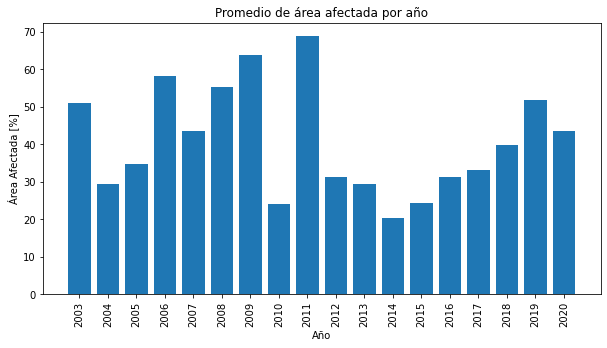

In [179]:
anual = data_preguntas.groupby(data_preguntas['Fecha'].dt.year)['Area_total_afectada_sequias'].mean().to_frame()

plt.figure(figsize = (10, 5))
plt.bar(anual.index,anual['Area_total_afectada_sequias'])
plt.xticks(range(2003,2021,1),rotation=90)
plt.xlabel('Año')
plt.ylabel('Área Afectada [%]')
plt.title('Promedio de área afectada por año')

Podemos observar que el porcentaje promediado de área afectada por sequías no presenta una tendencia fija; durante el periodo de 2003 a 2009, presentaba un incremento; pero al parecer durante el 2010 hubo una menor cantidad de área afectada, aunque para el 2011 ésta se duplicó y de ahí volvió a mostrar una tendencia ascendente aunque sin rebasando el pico de años pasados. 


#### ¿Qué estados han tenido el mayor porcentaje de área afectada por las sequías? 


Text(0.5, 1.0, 'Promedio de área afectada por estado (2002-2020)')

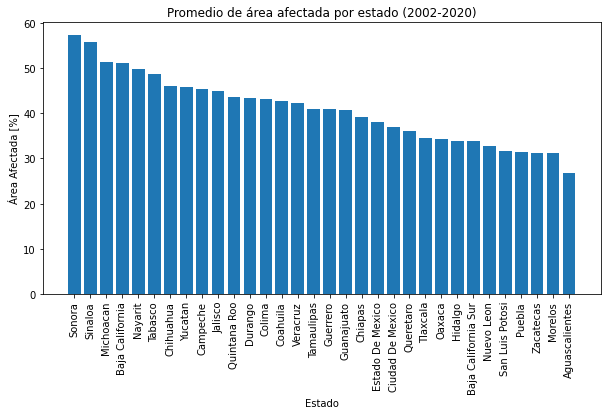

In [180]:
datos_estados = data_preguntas.groupby('Entidad')['Area_total_afectada_sequias'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize = (10, 5))
plt.bar(datos_estados.index,datos_estados['Area_total_afectada_sequias'])
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.ylabel('Área Afectada [%]')
plt.title('Promedio de área afectada por estado (2002-2020)')

Se puede apreciar que los tres primeros estados donde existe una mayor área afectada son estados del noroeste del país como son Sonora y Sinaloa, además de Michoacán, y por el otro extremo, los estados con menor área promedio afectada son estados del centro del país: Zacatecas, Morelos y Aguascalientes. 


#### ¿Cómo ha evolucionado el promedio mensual de precipitaciones a lo largo de los diferentes estados de nuestro país? 

Text(0.5, 0.98, 'Precipitaciones por Estado (2002-2020)')

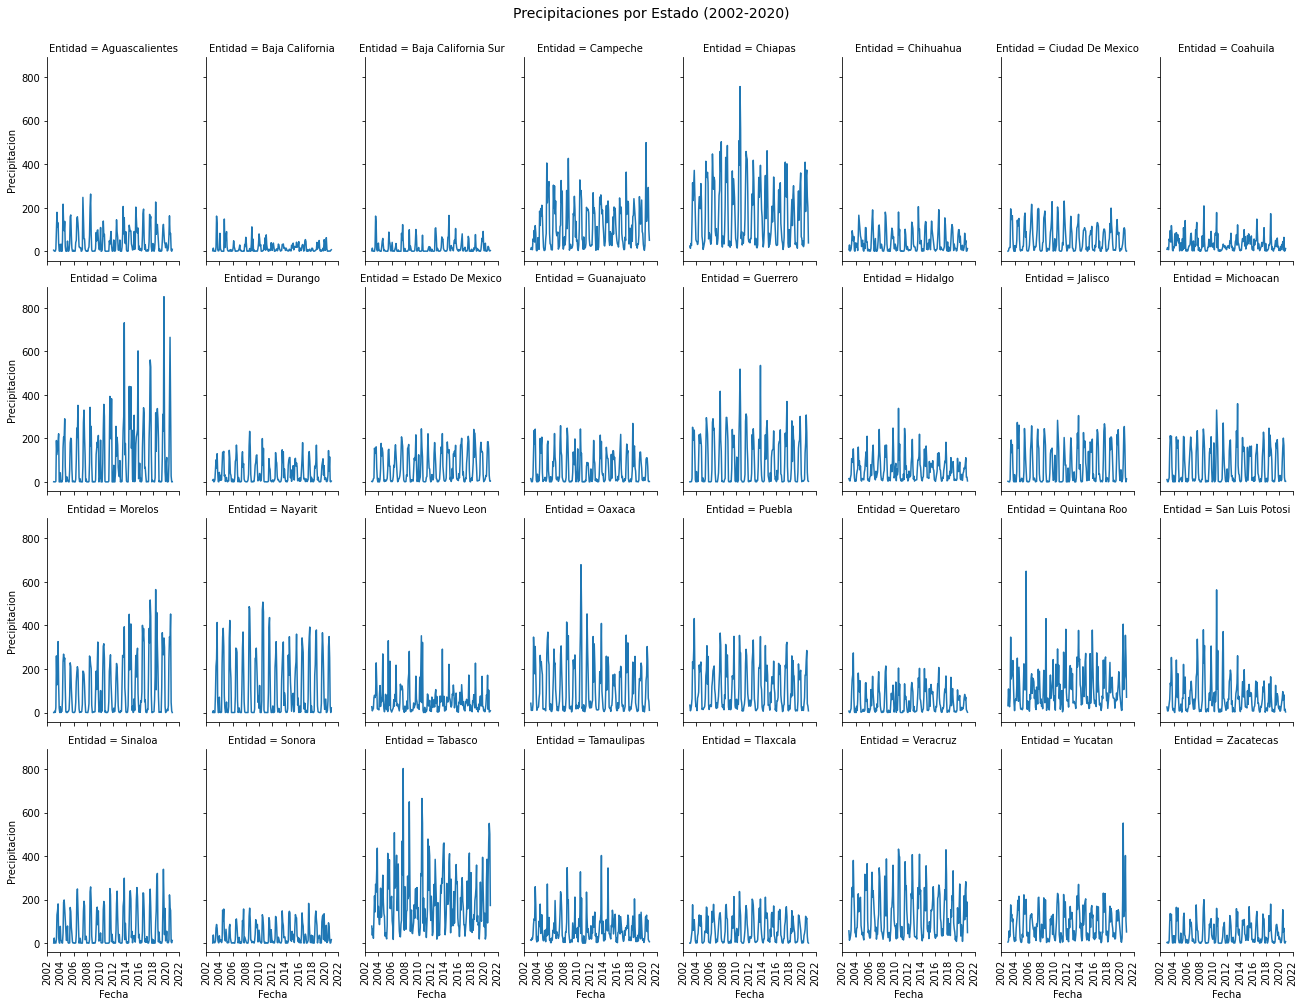

In [181]:
h = sns.FacetGrid(data_preguntas, col='Entidad', col_wrap=8, height=3.5, aspect=.65)
h.map(plt.plot, 'Fecha', 'Precipitacion')
h.set_xticklabels(rotation=90)
h.fig.subplots_adjust(top=0.93)
h.fig.suptitle('Precipitaciones por Estado (2002-2020)', fontsize=14)

A raíz de los datos observados se puede notar que los estados con mayores precipitaciones son Tabasco, Chiapas y Veracruz; Morelos por su parte, ha tenido un gran incremento a lo largo de los años, por otro lado, Baja California, Coahuila y Sonora presentan menores precipitaciones. A partir de lo anterior podemos inferir que en los climas húmedos como es gran parte del centro y sur del país llueve en mayor frecuencia, mientras que la región norte, compuesta por climas áridos y semi áridos, las precipitaciones son más escasas, lo que pudiera magnificar el impacto de la sequía, pues la cantidad de agua a disposición de la población es más reducida.

#### ¿Cuáles son los estados con un mayor índice de estrés agrícola en los últimos años? 



In [182]:
data_preguntas.groupby('Entidad')['IEA'].mean().sort_values(ascending=False).to_frame()

,IEA
Entidad,
Baja California Sur,32.037986
Baja California,20.250981
Sonora,19.663633
Coahuila,16.233978
Zacatecas,15.977412
Chihuahua,15.733659
Aguascalientes,15.461893
Durango,15.099427
Quintana Roo,14.795625


Al ordenar los datos por entidad y obtener el promedio del índice de estrés agrícola y mostrar los resultados de manera ascendente; se observa que los estados correspondientes al norte del país son los que presentan una alta probabilidad de estrés hídrico (sequía) de tierras cultivadas. Por otra parte, los estados de Guerrero, Oaxaca y Chiapas presentan un mejor nivel de vida en su vegetación.

#### ¿La temperatura está aumentando en el país?

Text(0.5, 1.0, 'Temperatura nacional')

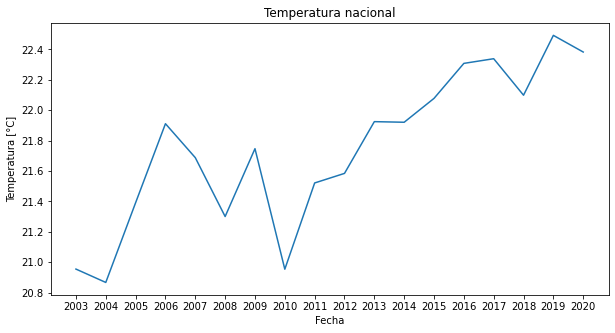

In [183]:
temperatura_nacional = data_preguntas.groupby(data_preguntas['Fecha'].dt.year)['Temperatura'].mean().to_frame()

plt.figure(figsize = (10, 5))
plt.plot(temperatura_nacional.index,temperatura_nacional['Temperatura'])
plt.xticks(range(2003,2021,1))
plt.xlabel('Fecha')
plt.ylabel('Temperatura [°C]')
plt.title('Temperatura nacional')

A partir de la gráfica anterior, podemos observar que la temperatura ha seguido una tendencia a la alza en nuestro país durante las últimas 2 decadas,  aumentado aproximadamente 1.5 grados centígrados en el año 2020 con respecto al valor promedio de 21 grados que tuvo durante el año 2003.


## Conclusiones


De acuerdo a la exploración de los datos, podemos observar que durante las 2 últimas décadas se ha producido un incremento en la temperatura promedio dentro de nuestro país, de forma similar la cantidad de precipitaciones ha disminuido, es decir cada vez llueve menos y las temperaturas son mayores. Esto tiene un impacto severo en regiones áridas y semiáridas, ya que la escaza agua que hay, se evapora con mayor facilidad. Asimismo, si analizamos el área afectada por las sequías, podemos observar que estados como Sinaloa y Michoacán han sido los principales afectados. Sí consideramos que las principales actividades productivas en estos estados son la agricultura, las sequías ponen en riesgo a los sectores primarios, además amenazar el suministro de alimentos a nivel nacional , pues ambos estados son considerados productores importantes en la rama de alimentos, tomando así una dimensión económica, social y ambiental



## Planes a futuro

Una vez procesados y explorados nuestros datos, estamos listos para continuar con su análisis estadístico, mayor visualización y predicción. Hemos realizado distintas consultas que nos han llevado a concluir con interesantes resultados como los anteriores, a partir de éstos podemos continuar con planteamientos hacia nuevas preguntas que nos ayudarán a encontrar una mejor relación de los eventos climatológicos previos. 

**Análisis estadístico**

Dentro de nuestros objetivos a futuro está la realización de un análisis estadístico de las sequías. Observar como ha sido numéricamente su variación con el tiempo así como estimar tendencias en los mismos datos para proponer meses/años que conformen la temporada de sequías en México.


**Visualización**

De igual manera, otra de nuestras propuestas es poder visualizar los estados de la república clasificados por su respectivo tipo de sequía. Además de ir representando nuestros resultados futuros y mejorar los anteriores, para tener una mayor claridad y lograr una mejor comunicación a través de gráficos y mapas.


**Predicción**

Nos interesaría conocer el comportamiento de las sequías o índice de estrés agrícola (IEA) en un futuro, es decir, poder predecir si dentro de 10 años ha aumentado o disminuido las sequías o IEA a nivel nacional. Otro ejemplo sería si se puede observar alguna tendencia en los datos que nos ayuden a pronosticar futuros cambios en la temperatura y precipitaciones en el país.

Finalmente buscamos que nuestro proyecto tenga un impacto para poder prevenir o mitigar los riesgos futuros que puedan existir ocasionados por un aumento de las sequías en México. Asimismo estamos abiertos a la posibilidad de agregar nuevos datos complementarios a nuestro dataframe actual para asegurar mejores resultados.